<a href="https://colab.research.google.com/github/RamcharanChandragiri/MACHINE-LEARNING/blob/main/ML_Lab_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUBTASK-01**

Multiple Linear Regression: Implementing Multiple Linear Regression and
evaluating its performance on a dataset.

Kaggle Dataset Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques?

Tasks:
1. Load train.csv and select multiple features such as GrLivArea, OverallQual,
TotalBsmtSF.

2. Handle missing values and split data into train/test sets.

3. Implement Multiple Linear Regression using libraries.
4. Evaluate model using MSE, RMSE, and R² score.
5. Interpret regression coefficients and comment on feature importance.


In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("housetrain.csv")

# Select features and target
features = ["GrLivArea", "OverallQual", "TotalBsmtSF"]
target = "SalePrice"

X = df[features]
y = df[target]

print(X.head())

   GrLivArea  OverallQual  TotalBsmtSF
0       1710            7          856
1       1262            6         1262
2       1786            7          920
3       1717            7          756
4       2198            8         1145


In [3]:
from sklearn.model_selection import train_test_split

# Handle missing values (use median for robustness)
X = X.fillna(X.median())

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (1168, 3)
Testing size: (292, 3)


In [4]:
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 1667657527.1633515
RMSE: 40836.96275634797
R² Score: 0.7825832328225167


In [6]:
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

print(coefficients)

print("Intercept:", model.intercept_)

       Feature   Coefficient
0    GrLivArea     47.136019
1  OverallQual  28203.610104
2  TotalBsmtSF     33.173543
Intercept: -98427.32987875512


**SUBTASK-02**

Multiple Linear Regression: Implementing Multiple Linear Regression and
evaluating its performance on a dataset.

Kaggle Dataset Link: https://www.kaggle.com/datasets/mirichoi0218/insurance?

Tasks:
1. Encode categorical variables (sex, smoker, region).
2. Use features: age, bmi, children, smoker → target: charges.
3. Train a Multiple Linear Regression model.
4. Evaluate using MAE, MSE, R² score.
5. Discuss which factors most influence insurance charges.


In [7]:
import pandas as pd

# 1) Load dataset
df = pd.read_csv("insurance.csv")

# 2) One-hot encode categorical variables (sex, smoker, region)
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# 3) Select features & target
features = ["age", "bmi", "children", "smoker_yes"]  # encoded smoker
X = df_encoded[features]
y = df_encoded["charges"]

print(X.head())

   age     bmi  children  smoker_yes
0   19  27.900         0        True
1   18  33.770         1       False
2   28  33.000         3       False
3   33  22.705         0       False
4   32  28.880         0       False


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 4213.798594527248
Mean Squared Error (MSE): 33981653.95019776
R² Score: 0.7811147722517886


In [11]:
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

print(coefficients)
print("Intercept:", model.intercept_)

      Feature   Coefficient
0         age    257.071158
1         bmi    327.522631
2    children    427.199971
3  smoker_yes  23653.211646
Intercept: -12117.075074107715


**SUBTASK-03**

Multiple Linear Regression: Implementing Multiple Linear Regression and
evaluating its performance on a dataset.

Kaggle Dataset Link: https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset?

Tasks:
1. Select features: TV, Radio, Newspaper → target: Sales.
2. Split data into training and testing sets (80/20).
3. Train Multiple Linear Regression model.
4. Evaluate performance using RMSE and R² score.
5. Compare results with simple linear regression (TV vs Sales).


In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv("Advertising Budget and Sales.csv")  # make sure file is named correctly

# Select features and target
X = df[["TV Ad Budget ($)", "Radio Ad Budget ($)", "Newspaper Ad Budget ($)"]]
y = df["Sales ($)"]

print(df.head())

   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (160, 3)
Test size: (40, 3)


In [16]:
from sklearn.linear_model import LinearRegression

# Create and fit model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Predict on test
y_pred_mlr = mlr.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Multiple Linear Regression metrics
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print("Multiple Linear Regression")
print("RMSE:", rmse_mlr)
print("R² Score:", r2_mlr)

Multiple Linear Regression
RMSE: 1.78159966153345
R² Score: 0.899438024100912


In [19]:
# Simple Linear Regression (TV only)
X_tv = df[["TV Ad Budget ($)"]]

X_tv_train, X_tv_test, y_tv_train, y_tv_test = train_test_split(
    X_tv, y, test_size=0.2, random_state=42
)

slr = LinearRegression()
slr.fit(X_tv_train, y_tv_train)

y_pred_slr = slr.predict(X_tv_test)

mse_slr = mean_squared_error(y_tv_test, y_pred_slr)
rmse_slr = np.sqrt(mse_slr)
r2_slr = r2_score(y_tv_test, y_pred_slr)

print("\nSimple Linear Regression (TV only)")
print("RMSE:", rmse_slr)
print("R² Score:", r2_slr)


Simple Linear Regression (TV only)
RMSE: 3.194472431998898
R² Score: 0.6766954295627076


**SUBTASK-04**

Multiple Linear Regression: Implementing Multiple Linear Regression and
evaluating its performance on a dataset.

Kaggle Dataset Link: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?

Tasks:
1. Select numeric features such as enginesize, horsepower, curbweight,
citympg.
2. Train a Multiple Linear Regression model.
3. Evaluate using MSE and R² score.
4. Analyze multicollinearity using correlation matrix.
5. Suggest improvements to the model.

In [20]:
import pandas as pd

# Load data (adjust filename to what you downloaded)
df = pd.read_csv("CarPrice_Assignment.csv")

# Select numeric features and target
features = ["enginesize", "horsepower", "curbweight", "citympg"]
X = df[features]
y = df["price"]

print(X.head())
print(y.head())

   enginesize  horsepower  curbweight  citympg
0         130         111        2548       21
1         130         111        2548       21
2         152         154        2823       19
3         109         102        2337       24
4         136         115        2824       18
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (164, 4)
Test shape: (41, 4)


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 14552806.863186449
R² Score: 0.8156566298368466


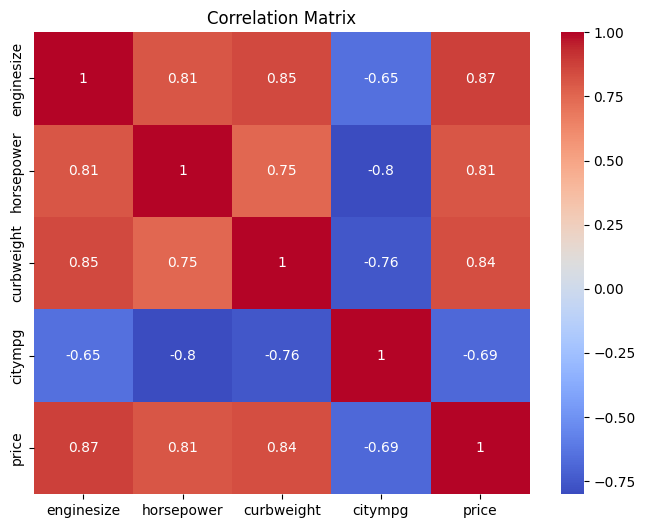

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr_matrix = df[features + ["price"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [25]:
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

print(coeff_df)
print("Intercept:", model.intercept_)

      Feature  Coefficient
0  enginesize    80.396655
1  horsepower    48.838491
2  curbweight     3.935889
3     citympg   -47.919409
Intercept: -10913.7181096743


**SUBTASK-05**

Multiple Linear Regression: Implementing Multiple Linear Regression and
evaluating its performance on a dataset.

Kaggle Dataset Link:
https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

Tasks:
1. Select features like Engine Size, Cylinders, Fuel Consumption.
2. Target variable: CO2 Emissions.
3. Implement Multiple Linear Regression.
4. Evaluate model using RMSE and R² score.
5. Interpret coefficients and explain environmental impact.


In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv("CO2 Emissions_Canada.csv")  # adjust name if different

# Display available columns to identify correct names
print("Available columns:", df.columns)

# Select numeric features and define target
features = [
    "Engine Size(L)",                    # engine size (liters)
    "Cylinders",                       # number of cylinders
    "Fuel Consumption City (L/100 km)",  # city fuel consumption
    "Fuel Consumption Hwy (L/100 km)"    # highway fuel consumption
]
X = df[features]
y = df["CO2 Emissions(g/km)"]           # CO2 emissions target

print(X.head())
print(y.head())

Available columns: Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')
   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0             2.0          4                               9.9   
1             2.4          4                              11.2   
2             1.5          4                               6.0   
3             3.5          6                              12.7   
4             3.5          6                              12.1   

   Fuel Consumption Hwy (L/100 km)  
0                              6.7  
1                              7.7  
2                              5.8  
3                              9.1  
4                              8.7  
0    196
1    221
2    136
3    255
4    244
Name: CO2 E

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 20.54363573587694
R² Score: 0.8773003821678078


In [32]:
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

print(coeff_df)
print("Intercept:", model.intercept_)

                            Feature  Coefficient
0                    Engine Size(L)     5.624716
1                         Cylinders     6.431374
2  Fuel Consumption City (L/100 km)     7.097034
3   Fuel Consumption Hwy (L/100 km)     6.250174
Intercept: 51.168888461233394


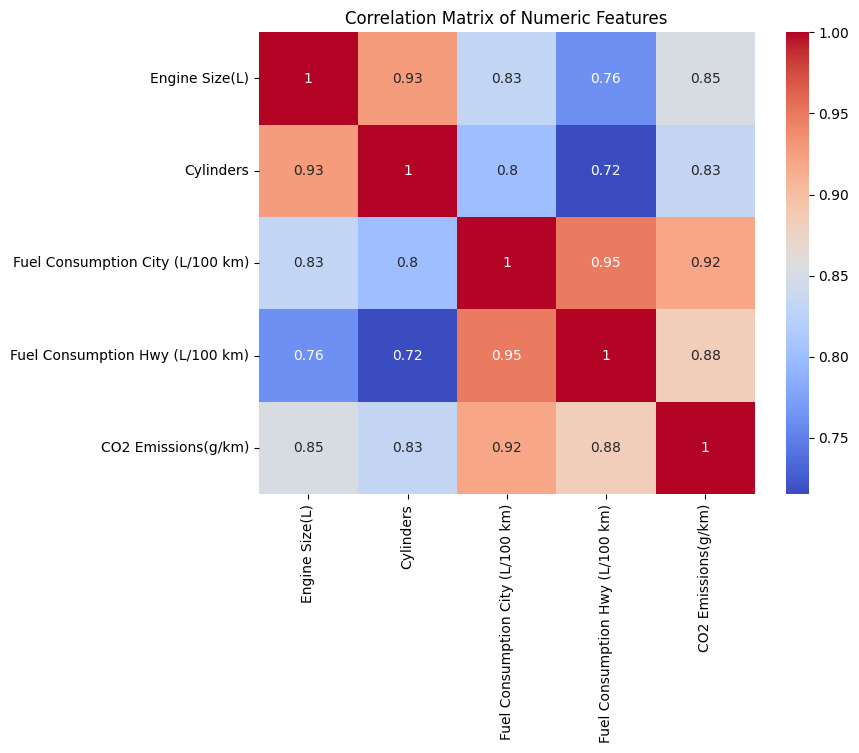

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[features + ["CO2 Emissions(g/km)"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()